In [ ]:
import numpy as np
import pandas as pd
import glob
import os
pd.set_option('display.max_columns', None)


#WiFI Dataset

## Load Dataset

In [ ]:
#Load 1ft Dataset

path = '/content/drive/MyDrive/INL WIFI Dataset/1ft_V2/run1' # use your path
path2 = '/content/drive/MyDrive/INL WIFI Dataset/1ft_V2/run2'

#load 5ft Dataset
path3 = '/content/drive/MyDrive/INL WIFI Dataset/5ft_V2/run1'
path4 = '/content/drive/MyDrive/INL WIFI Dataset/5ft_V2/run2'

all_files = glob.glob(os.path.join(path , "*.csv"))
#combine all summary csv into one dataframe
df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)
df['distanceft'] = 1
all_files = all_files = glob.glob(os.path.join(path2 , "*.csv"))
df2 = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)
df2['distanceft'] = 1


all_files = all_files = glob.glob(os.path.join(path3 , "*.csv"))
df3 = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)
df3['distanceft'] = 5

all_files = all_files = glob.glob(os.path.join(path4 , "*.csv"))
df4 = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)
df4['distanceft'] = 5

df = pd.concat([df, df2,df3,df4])

#Remove Devices PI2 and PI2.fs
df = df[~df['device_id'].isin(['pi2', 'pi2.fs'])]

df = df.drop(columns=[ 'hidden_ssid', 'test_id', 'min_latency', 'max_latency', 'std_latency', 'mean_latency'])

display(df)

,configuration_id,wpa_enabled,wpa2_enabled,tkip_enabled,ccmp_enabled,router_mode,channel_width,disassoc_low_ack,skip_inactivity_poll,file_size_bytes,file_type,file_direction,device_id,num_concurrent,start_time,end_time,total_size_bytes,packets_received,unique_packets,median_latency,distanceft
0,1,0,0,0,0,N,20,1,0,6455296,csv,down,pi0,1,1.683837e+09,1.683837e+09,6496792,5534,5534,0.000039,1
1,1,0,0,0,0,N,20,1,0,6455296,csv,down,pi0.fs,1,1.684274e+09,1.684274e+09,6520330,1245,1245,0.000077,1
2,1,0,0,0,0,N,20,1,0,6455296,csv,down,pi0,2,1.683837e+09,1.683837e+09,6509376,5414,5414,0.000039,1
3,1,0,0,0,0,N,20,1,0,6455296,csv,down,pi0.fs,2,1.684274e+09,1.684274e+09,6517574,1192,1192,0.000087,1
4,1,0,0,0,0,N,20,1,0,6455296,csv,down,pi1,2,1.678309e+09,1.678309e+09,6540996,5131,5131,0.000026,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103675,40,1,1,0,1,AC,80,1,0,3997696,csv,down,pi5.fs,8,1.691154e+09,1.691154e+09,4064662,1191,1159,0.000016,5
103676,40,1,1,0,1,AC,80,1,0,3997696,csv,down,pi6,8,1.677512e+09,1.677512e+09,4112882,3282,3245,0.000025,5
103677,40,1,1,0,1,AC,80,1,0,3997696,csv,down,pi6.fs,8,1.691154e+09,1.691154e+09,4041174,766,730,0.000022,5
103678,40,1,1,0,1,AC,80,1,0,3997696,csv,down,pi7,8,1.677512e+09,1.677512e+09,4106976,3378,3378,0.000028,5


In [ ]:
df['packets_dropped'] = df['packets_received'] - df['unique_packets']
df['bytes_per_device']= df['total_size_bytes'] / df['num_concurrent']           #Maybe Keep As A Feature
df["duration"] = df["end_time"] - df["start_time"]                              #Maybe Keep AS A Feature
df['throughput'] = df['total_size_bytes'] / df['duration']

df = df.drop(columns=['start_time', 'end_time',
                      'packets_received', 'unique_packets'])

display(df)

,configuration_id,wpa_enabled,wpa2_enabled,tkip_enabled,ccmp_enabled,router_mode,channel_width,disassoc_low_ack,skip_inactivity_poll,file_size_bytes,file_type,file_direction,device_id,num_concurrent,total_size_bytes,median_latency,distanceft,packets_dropped,bytes_per_device,duration,throughput
0,1,0,0,0,0,N,20,1,0,6455296,csv,down,pi0,1,6496792,0.000039,1,0,6496792.00,0.901650,7.205446e+06
1,1,0,0,0,0,N,20,1,0,6455296,csv,down,pi0.fs,1,6520330,0.000077,1,0,6520330.00,0.948951,6.871092e+06
2,1,0,0,0,0,N,20,1,0,6455296,csv,down,pi0,2,6509376,0.000039,1,0,3254688.00,0.848545,7.671220e+06
3,1,0,0,0,0,N,20,1,0,6455296,csv,down,pi0.fs,2,6517574,0.000087,1,0,3258787.00,0.893508,7.294366e+06
4,1,0,0,0,0,N,20,1,0,6455296,csv,down,pi1,2,6540996,0.000026,1,0,3270498.00,0.820666,7.970352e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103675,40,1,1,0,1,AC,80,1,0,3997696,csv,down,pi5.fs,8,4064662,0.000016,5,32,508082.75,0.808765,5.025764e+06
103676,40,1,1,0,1,AC,80,1,0,3997696,csv,down,pi6,8,4112882,0.000025,5,37,514110.25,0.398117,1.033084e+07
103677,40,1,1,0,1,AC,80,1,0,3997696,csv,down,pi6.fs,8,4041174,0.000022,5,36,505146.75,0.402806,1.003256e+07
103678,40,1,1,0,1,AC,80,1,0,3997696,csv,down,pi7,8,4106976,0.000028,5,0,513372.00,0.773546,5.309285e+06


In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Initialize the scaler
scaler = MinMaxScaler()

# Replace any infinity values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Handle zeros in 'packets_dropped' before division
df['packets_dropped'].replace(0, 0.1, inplace=True)

# Scale inverted 'mean_latency'
df['scaled_latency'] = scaler.fit_transform((1 / df['median_latency']).values.reshape(-1, 1))

# Scale inverted 'packets_dropped'
df['scaled_dropped_packets'] = scaler.fit_transform((1 / df['packets_dropped']).values.reshape(-1, 1))

# Scale 'bytes_per_second' directly
df['scaled_bps'] = scaler.fit_transform(df['throughput'].values.reshape(-1, 1))

# Compute QoS
df['QoS'] = (df['scaled_latency'] + df['scaled_dropped_packets'] + df['scaled_bps']) / 3

display(df)

,configuration_id,wpa_enabled,wpa2_enabled,tkip_enabled,ccmp_enabled,router_mode,channel_width,disassoc_low_ack,skip_inactivity_poll,file_size_bytes,file_type,file_direction,device_id,num_concurrent,total_size_bytes,median_latency,distanceft,packets_dropped,bytes_per_device,duration,throughput,scaled_latency,scaled_dropped_packets,scaled_bps,QoS
0,1,0,0,0,0,N,20,1,0,6455296,csv,down,pi0,1,6496792,0.000039,1,0.1,6496792.00,0.901650,7.205446e+06,0.078354,1.000000,0.617395,0.565250
1,1,0,0,0,0,N,20,1,0,6455296,csv,down,pi0.fs,1,6520330,0.000077,1,0.1,6520330.00,0.948951,6.871092e+06,0.038539,1.000000,0.588698,0.542413
2,1,0,0,0,0,N,20,1,0,6455296,csv,down,pi0,2,6509376,0.000039,1,0.1,3254688.00,0.848545,7.671220e+06,0.077867,1.000000,0.657370,0.578413
3,1,0,0,0,0,N,20,1,0,6455296,csv,down,pi0.fs,2,6517574,0.000087,1,0.1,3258787.00,0.893508,7.294366e+06,0.034149,1.000000,0.625026,0.553058
4,1,0,0,0,0,N,20,1,0,6455296,csv,down,pi1,2,6540996,0.000026,1,0.1,3270498.00,0.820666,7.970352e+06,0.117926,1.000000,0.683044,0.600323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103675,40,1,1,0,1,AC,80,1,0,3997696,csv,down,pi5.fs,8,4064662,0.000016,5,32.0,508082.75,0.808765,5.025764e+06,0.192804,0.003094,0.430321,0.208740
103676,40,1,1,0,1,AC,80,1,0,3997696,csv,down,pi6,8,4112882,0.000025,5,37.0,514110.25,0.398117,1.033084e+07,0.122476,0.002672,0.885635,0.336928
103677,40,1,1,0,1,AC,80,1,0,3997696,csv,down,pi6.fs,8,4041174,0.000022,5,36.0,505146.75,0.402806,1.003256e+07,0.139998,0.002747,0.860035,0.334260
103678,40,1,1,0,1,AC,80,1,0,3997696,csv,down,pi7,8,4106976,0.000028,5,0.1,513372.00,0.773546,5.309285e+06,0.109759,1.000000,0.454654,0.521471


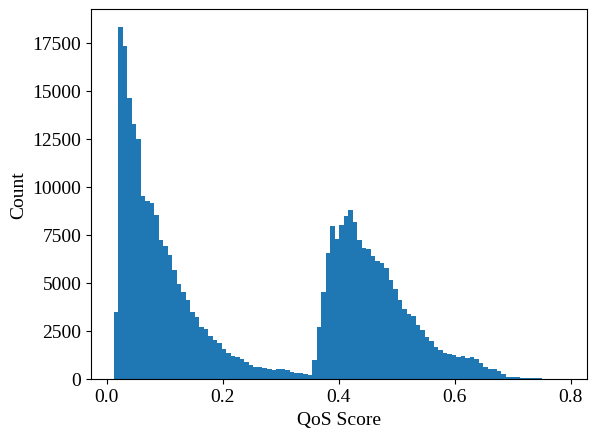

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams['font.family'] = "Liberation Serif"
plt.rcParams['font.size'] = 14  # You can adjust the size here
plt.hist(df['QoS'], alpha=1 ,bins=100)
plt.xlabel("QoS Score")
plt.ylabel("Count")
plt.savefig("QoS_Distribution.pdf", format='pdf', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
df.drop(columns=['disassoc_low_ack', 'skip_inactivity_poll', 'median_latency', 'throughput'],
               inplace=True)
#encodeddf['packets_dropped'] = scaler.fit_transform(encodeddf[['packets_dropped']])
df.drop(columns=['scaled_dropped_packets', 'scaled_bps', 'scaled_latency', 'packets_dropped'], inplace=True)
display(df)

,configuration_id,wpa_enabled,wpa2_enabled,tkip_enabled,ccmp_enabled,router_mode,channel_width,file_size_bytes,file_type,file_direction,device_id,num_concurrent,total_size_bytes,distanceft,bytes_per_device,duration,QoS
0,1,0,0,0,0,N,20,6455296,csv,down,pi0,1,6496792,1,6496792.00,0.901650,0.565250
1,1,0,0,0,0,N,20,6455296,csv,down,pi0.fs,1,6520330,1,6520330.00,0.948951,0.542413
2,1,0,0,0,0,N,20,6455296,csv,down,pi0,2,6509376,1,3254688.00,0.848545,0.578413
3,1,0,0,0,0,N,20,6455296,csv,down,pi0.fs,2,6517574,1,3258787.00,0.893508,0.553058
4,1,0,0,0,0,N,20,6455296,csv,down,pi1,2,6540996,1,3270498.00,0.820666,0.600323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103675,40,1,1,0,1,AC,80,3997696,csv,down,pi5.fs,8,4064662,5,508082.75,0.808765,0.208740
103676,40,1,1,0,1,AC,80,3997696,csv,down,pi6,8,4112882,5,514110.25,0.398117,0.336928
103677,40,1,1,0,1,AC,80,3997696,csv,down,pi6.fs,8,4041174,5,505146.75,0.402806,0.334260
103678,40,1,1,0,1,AC,80,3997696,csv,down,pi7,8,4106976,5,513372.00,0.773546,0.521471




You need to check if that data is gaussian and if the data groups have equal variances.

If data is normally distributed and gaussian, a parametric test would work, However, if both assumptions are not true, then you need to use a non-parametric test


## Gathering Results



* Group A = 443,926 Bytes
* Group B = 6,455,296 Bytes
* Group C = 51,039,935 Bytes
* Group D = All Files

### Random Forests

#### preprocessing

In [ ]:
encodeddf = df.drop(columns=['configuration_id', 'total_size_bytes', 'bytes_per_device', 'duration'])
categorical_columns = ['router_mode', 'device_id', 'file_type', 'file_direction', 'distanceft', 'channel_width']      #Maybe add file_size_bytes, num_concurrent to this list
encodeddf = pd.get_dummies(encodeddf, columns = categorical_columns)

display(encodeddf)


,wpa_enabled,wpa2_enabled,tkip_enabled,ccmp_enabled,file_size_bytes,num_concurrent,QoS,router_mode_AC,router_mode_N,device_id_pi0,device_id_pi0.fs,device_id_pi1,device_id_pi1.fs,device_id_pi3,device_id_pi3.fs,device_id_pi4,device_id_pi4.fs,device_id_pi5,device_id_pi5.fs,device_id_pi6,device_id_pi6.fs,device_id_pi7,device_id_pi7.fs,file_type_csv,file_type_doc,file_type_jpg,file_type_mp3,file_type_mp4,file_type_pdf,file_type_txt,file_type_xls,file_type_zip,file_direction_down,file_direction_up,distanceft_1,distanceft_5,channel_width_20,channel_width_40,channel_width_80
0,0,0,0,0,6455296,1,0.565250,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0
1,0,0,0,0,6455296,1,0.542413,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0
2,0,0,0,0,6455296,2,0.578413,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0
3,0,0,0,0,6455296,2,0.553058,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0
4,0,0,0,0,6455296,2,0.600323,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103675,1,1,0,1,3997696,8,0.208740,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
103676,1,1,0,1,3997696,8,0.336928,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
103677,1,1,0,1,3997696,8,0.334260,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
103678,1,1,0,1,3997696,8,0.521471,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split

x = encodeddf.drop(columns=['QoS'])
y = df['QoS']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
num_cols = len(x_train.axes[1])
print("Number of columns in x_train: ", num_cols)

Number of columns in x_train:  38


#### Random forest model

In [ ]:
best_criterion = "squared_error"
best_max_depth = 19
best_max_features = 26
best_min_samples_leaf = 12
best_min_samples_split = 6
best_n_estimators = 500

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
#model =  RandomForestRegressor(n_estimators=495, criterion='squared_error', max_depth=66, max_features=round(num_cols/3), min_samples_leaf=14, min_samples_split=20, random_state=42, n_jobs=-1)
model = RandomForestRegressor(criterion = 'friedman_mse', max_depth = best_max_depth, max_features = best_max_features, min_samples_leaf=best_min_samples_leaf, min_samples_split=best_min_samples_split, n_estimators= best_n_estimators, n_jobs=-1, random_state=42)
# Train the model
model.fit(x_train, y_train)



RandomForestRegressor(criterion='friedman_mse', max_depth=19, max_features=26,
                      min_samples_leaf=12, min_samples_split=6,
                      n_estimators=500, n_jobs=-1, random_state=42)

In [ ]:
# Make predictions
y_pred = model.predict(x_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print(f'MSE: {mse}, R^2: {r2}')

absolute_percentage_error = np.abs((y_pred - y_test) / (y_test) * 100)
#print(absolute_percentage_error)

mape = np.mean(absolute_percentage_error)

print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Error (MAE): 0.07560540749418139
MSE: 0.012458454405047826, R^2: 0.6841013806650562
Mean Absolute Percentage Error (MAPE): 51.283701837008984


##### Analysis

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 12.7 MB/s eta 0:00:00


In [ ]:
import shap

In [ ]:
explainer = shap.Explainer(model)
shap_values = explainer(x)

In [ ]:
shap.plots.waterfall(shap_values[0])

#### HyperParameter Tuning

In [ ]:
!pip install bayesian-optimization

In [ ]:
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score

In [ ]:
#def objective(max_depth, n_estimators, max_features, criterion_index, min_samples_leaf, min_samples_split):
    criterion_options = ['squared_error', 'friedman_mse', 'poisson', 'absolute_error']
    criterion = criterion_options[int(criterion_index)]

    model = RandomForestRegressor(max_depth=int(max_depth),
                                  n_estimators=int(n_estimators),
                                  max_features=min(max_features, 0.999),  # Fraction, must be <= 1.0
                                  criterion = criterion,
                                  min_samples_leaf=int(min_samples_leaf),
                                  min_samples_split=int(min_samples_split),
                                  random_state=42,
                                  n_jobs=-1)

    return -1.0 * cross_val_score(model, x_train, y_train, cv=3, scoring="r2").mean()

In [ ]:
param_bounds = {
    'max_depth': (10, 100),  # Assuming continuous for optimization
    'n_estimators': (10, 500),
    'max_features': (1, 48),  # This will be scaled within the objective function
    'min_samples_leaf': (1, 5),
    'min_samples_split': (2, 10),
    'criterion_index': (0, 3)  # Indexing the criterion list
}

In [ ]:
optimizer = BayesianOptimization(f=objective, pbounds=param_bounds, random_state=42)
optimizer.maximize(init_points=5, n_iter=15)

|   iter    |  target   | criter... | max_depth | max_fe... | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------------------
| 1         | -0.6038   | 1.124     | 95.56     | 35.4      | 3.395     | 3.248     | 86.44     |
| 2         | -0.6042   | 0.1743    | 87.96     | 29.25     | 3.832     | 2.165     | 485.3     |
| 3         | -0.5951   | 2.497     | 29.11     | 9.546     | 1.734     | 4.434     | 267.1     |
| 4         | -0.595    | 1.296     | 36.21     | 29.76     | 1.558     | 4.337     | 189.5     |
| 5         | -0.6028   | 1.368     | 80.67     | 10.38     | 3.057     | 6.739     | 32.76     |
| 6         | -0.6125   | 0.0       | 100.0     | 48.0      | 5.0       | 10.0      | 253.1     |
| 7         | -0.601    | 2.612     | 28.86     | 10.69     | 2.042     | 6.597     | 265.1     |
| 8         | -0.5991   | 2.427     | 27.21     | 9.432     | 2.559     | 3.005     | 269.0     |
| 9         | -0.604

#### feature importance

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    model, x_test, y_test, n_repeats=10,random_state=42, n_jobs=-1
)

In [ ]:
feature_names= [f"feautre{i}" for i in range(x.shape[1])]
feature_names = x.columns.tolist()
forest_importances= pd.Series(result.importances_mean, index=feature_names )

In [ ]:
forest_importances

wpa_enabled            0.001937
wpa2_enabled           0.003878
tkip_enabled           0.277626
ccmp_enabled           0.434835
file_size_bytes        0.382215
num_concurrent         0.258961
router_mode_AC         0.000117
router_mode_N          0.000112
device_id_pi0          0.014305
device_id_pi0.fs       0.002742
device_id_pi1          0.027976
device_id_pi1.fs       0.000264
device_id_pi3          0.020128
device_id_pi3.fs       0.000186
device_id_pi4          0.016779
device_id_pi4.fs       0.000487
device_id_pi5          0.011202
device_id_pi5.fs       0.000432
device_id_pi6          0.008281
device_id_pi6.fs       0.000618
device_id_pi7          0.002703
device_id_pi7.fs       0.000168
file_type_csv          0.001080
file_type_doc          0.000066
file_type_jpg         -0.000032
file_type_mp3          0.001821
file_type_mp4         -0.000090
file_type_pdf         -0.000142
file_type_txt          0.000004
file_type_xls          0.000105
file_type_zip          0.006814
file_dir

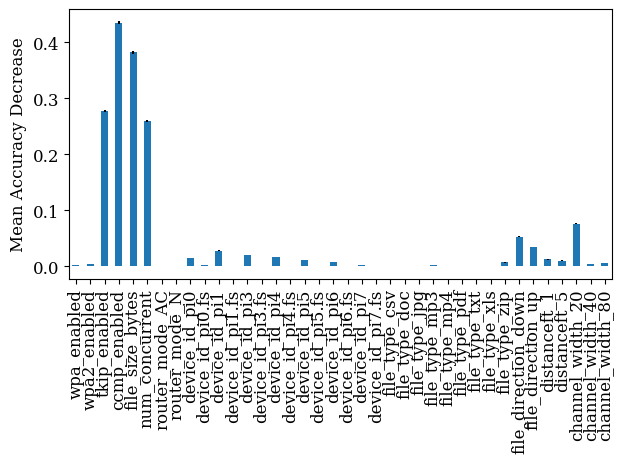

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.rcParams['font.family'] = "Serif"
plt.rcParams['font.size'] = 12  # You can adjust the size here
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
#ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean Accuracy Decrease")
fig.tight_layout()
plt.ylim=0
# Save the figure as a PDF
plt.savefig("feature_importances.pdf")
plt.show()

In [ ]:
# Get numerical feature importances
importances = list(model.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(feature_names, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]
## what's the direction of the important feature?
# file size/type, traffic type would be important
# if we use file size/type then we won't need test id

features = [pair[0] for pair in feature_importances]
importance_values = [pair[1] for pair in feature_importances]

# Plot
plt.figure(figsize=(10, 8))
plt.barh(features, importance_values, align='center')  # 'barh' creates horizontal bar chart
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Variable Importances')
plt.gca().invert_yaxis()  # This inverts the y-axis to have the most important feature on top
plt.savefig("feature_importances_sorted.pdf")

plt.show()

### Mean QoS Score of the different config

In [ ]:
df

,configuration_id,wpa_enabled,wpa2_enabled,tkip_enabled,ccmp_enabled,router_mode,channel_width,file_size_bytes,file_type,file_direction,device_id,num_concurrent,total_size_bytes,distanceft,bytes_per_device,duration,QoS
0,1,0,0,0,0,N,20,6455296,csv,down,pi0,1,6496792,1,6496792.00,0.901650,0.565250
1,1,0,0,0,0,N,20,6455296,csv,down,pi0.fs,1,6520330,1,6520330.00,0.948951,0.542413
2,1,0,0,0,0,N,20,6455296,csv,down,pi0,2,6509376,1,3254688.00,0.848545,0.578413
3,1,0,0,0,0,N,20,6455296,csv,down,pi0.fs,2,6517574,1,3258787.00,0.893508,0.553058
4,1,0,0,0,0,N,20,6455296,csv,down,pi1,2,6540996,1,3270498.00,0.820666,0.600323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103675,40,1,1,0,1,AC,80,3997696,csv,down,pi5.fs,8,4064662,5,508082.75,0.808765,0.208740
103676,40,1,1,0,1,AC,80,3997696,csv,down,pi6,8,4112882,5,514110.25,0.398117,0.336928
103677,40,1,1,0,1,AC,80,3997696,csv,down,pi6.fs,8,4041174,5,505146.75,0.402806,0.334260
103678,40,1,1,0,1,AC,80,3997696,csv,down,pi7,8,4106976,5,513372.00,0.773546,0.521471


In [ ]:
mean_qos_per_config = df.groupby('configuration_id')['QoS'].mean()
mean_qos_per_config

configuration_id
1     0.285064
2     0.346733
3     0.279735
4     0.342967
5     0.362233
6     0.086924
7     0.089151
8     0.086511
9     0.086788
10    0.085669
11    0.268576
12    0.340621
13    0.266812
14    0.337655
15    0.365633
16    0.269241
17    0.340919
18    0.268846
19    0.341041
20    0.359069
21    0.088214
22    0.086696
23    0.086462
24    0.082289
25    0.083245
26    0.269022
27    0.340643
28    0.274841
29    0.338703
30    0.358361
31    0.276357
32    0.339901
33    0.275511
34    0.337541
35    0.357501
36    0.275719
37    0.340043
38    0.275634
39    0.346236
40    0.363719
Name: QoS, dtype: float64

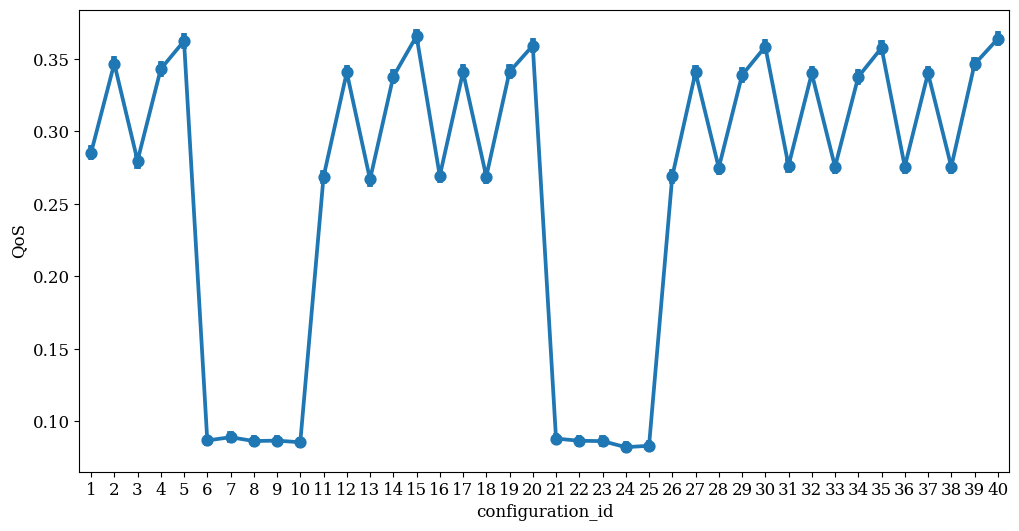

In [ ]:
import seaborn as sns

#Mean qos value of the different config values
plt.figure(figsize=(12, 6))
sns.pointplot(x='configuration_id', y='QoS', data=df, capsize=.1)
plt.savefig("qos_distribution_all.pdf", format='pdf', dpi=300, bbox_inches='tight')

plt.show()

## Groups

In [ ]:
print('----------GROUP NO SEC ----------')
group_A = df[(df['wpa_enabled'] == 0) & (df['wpa2_enabled'] == 0) & (df['tkip_enabled'] == 0) & (df['ccmp_enabled'] == 0) & (df['router_mode'] == 'AC') & (df['channel_width'] == 80) & (df['file_size_bytes'] == 443926)]['QoS']
display(group_A)
group_B = df[(df['wpa_enabled'] == 0) & (df['wpa2_enabled'] == 0) & (df['tkip_enabled'] == 0) & (df['ccmp_enabled'] == 0) & (df['router_mode'] == 'AC') & (df['channel_width'] == 80) & (df['file_size_bytes'] == 6455296)]['QoS']
display(group_B)
group_C = df[(df['wpa_enabled'] == 0) & (df['wpa2_enabled'] == 0) & (df['tkip_enabled'] == 0) & (df['ccmp_enabled'] == 0) & (df['router_mode'] == 'AC') & (df['channel_width'] == 80) & (df['file_size_bytes'] == 51039935)]['QoS']
display(group_C)
group_D = df[(df['wpa_enabled'] == 0) & (df['wpa2_enabled'] == 0) & (df['tkip_enabled'] == 0) & (df['ccmp_enabled'] == 0) & (df['router_mode'] == 'AC') & (df['channel_width'] == 80)]['QoS']
display(group_D)

print('----------GROUP A ----------')
group_A_1 = df[(df['configuration_id'] == 10) & (df['file_size_bytes'] == 443926)]['QoS']
display(group_A_1)
group_A_2 = df[(df['configuration_id'] == 15) & (df['file_size_bytes'] == 443926)]['QoS']
display(group_A_2)
group_A_3 = df[(df['configuration_id'] == 20) & (df['file_size_bytes'] == 443926)]['QoS']
display(group_A_3)
group_A_4 = df[(df['configuration_id'] == 25) & (df['file_size_bytes'] == 443926)]['QoS']
display(group_A_4)
group_A_5 = df[(df['configuration_id'] == 30) & (df['file_size_bytes'] == 443926)]['QoS']
display(group_A_5)
group_A_6 = df[(df['configuration_id'] == 35) & (df['file_size_bytes'] == 443926)]['QoS']
display(group_A_6)

print('----------GROUP B ----------')
group_B_1 = df[(df['configuration_id'] == 10) & (df['file_size_bytes'] == 6455296)]['QoS']
display(group_B_1)
group_B_2 = df[(df['configuration_id'] == 15) & (df['file_size_bytes'] == 6455296)]['QoS']
display(group_B_2)
group_B_3 = df[(df['configuration_id'] == 20) & (df['file_size_bytes'] == 6455296)]['QoS']
display(group_B_3)
group_B_4 = df[(df['configuration_id'] == 25) & (df['file_size_bytes'] == 6455296)]['QoS']
display(group_B_4)
group_B_5 = df[(df['configuration_id'] == 30) & (df['file_size_bytes'] == 6455296)]['QoS']
display(group_B_5)
group_B_6 = df[(df['configuration_id'] == 35) & (df['file_size_bytes'] == 6455296)]['QoS']
display(group_B_6)

print('----------GROUP C ----------')
group_C_1 = df[(df['configuration_id'] == 10) & (df['file_size_bytes'] == 51039935)]['QoS']
display(group_C_1)
group_C_2 = df[(df['configuration_id'] == 15) & (df['file_size_bytes'] == 51039935)]['QoS']
display(group_C_2)
group_C_3 = df[(df['configuration_id'] == 20) & (df['file_size_bytes'] == 51039935)]['QoS']
display(group_C_3)
group_C_4 = df[(df['configuration_id'] == 25) & (df['file_size_bytes'] == 51039935)]['QoS']
display(group_C_4)
group_C_5 = df[(df['configuration_id'] == 30) & (df['file_size_bytes'] == 51039935)]['QoS']
display(group_C_5)
group_C_6 = df[(df['configuration_id'] == 35) & (df['file_size_bytes'] == 51039935)]['QoS']
display(group_C_6)

print('----------GROUP D----------')
group_D_1 = df[(df['configuration_id'] == 10)]['QoS']
display(group_D_1)
group_D_2 = df[(df['configuration_id'] == 15)]['QoS']
display(group_D_2)
group_D_3 = df[(df['configuration_id'] == 20)]['QoS']
display(group_D_3)
group_D_4 = df[(df['configuration_id'] == 25)]['QoS']
display(group_D_4)
group_D_5 = df[(df['configuration_id'] == 30)]['QoS']
display(group_D_5)
group_D_6 = df[(df['configuration_id'] == 35)]['QoS']
display(group_D_6)


----------GROUP NO SEC ----------


10656    0.555708
10657    0.504246
10658    0.489620
10659    0.482447
10660    0.554447
           ...   
12163    0.498067
12164    0.512244
12165    0.478450
12166    0.513558
12167    0.454027
Name: QoS, Length: 480, dtype: float64

10368    0.278725
10369    0.261632
10370    0.632534
10371    0.597740
10372    0.649139
           ...   
11155    0.154172
11156    0.480944
11157    0.424275
11158    0.506106
11159    0.138686
Name: QoS, Length: 480, dtype: float64

10872    0.297911
10873    0.273371
10874    0.207271
10875    0.182868
10876    0.214321
           ...   
12379    0.186953
12380    0.194882
12381    0.129883
12382    0.226488
12383    0.139741
Name: QoS, Length: 480, dtype: float64

10368    0.278725
10369    0.261632
10370    0.632534
10371    0.597740
10372    0.649139
           ...   
12955    0.563191
12956    0.541632
12957    0.560316
12958    0.227136
12959    0.230394
Name: QoS, Length: 8640, dtype: float64

----------GROUP A ----------


23616    0.470457
23617    0.503396
23618    0.442986
23619    0.470614
23620    0.420174
           ...   
25123    0.070196
25124    0.027354
25125    0.043808
25126    0.368688
25127    0.072640
Name: QoS, Length: 480, dtype: float64

36576    0.539080
36577    0.503917
36578    0.517149
36579    0.513075
36580    0.584295
           ...   
38083    0.490197
38084    0.420285
38085    0.434466
38086    0.460377
38087    0.444792
Name: QoS, Length: 480, dtype: float64

49536    0.549728
49537    0.530338
49538    0.494564
49539    0.472234
49540    0.567298
           ...   
51043    0.438909
51044    0.397590
51045    0.403540
51046    0.405817
51047    0.432778
Name: QoS, Length: 480, dtype: float64

62496    0.473860
62497    0.475027
62498    0.435384
62499    0.463133
62500    0.404848
           ...   
64003    0.066456
64004    0.354651
64005    0.374547
64006    0.025727
64007    0.034120
Name: QoS, Length: 480, dtype: float64

75456    0.510307
75457    0.493883
75458    0.511548
75459    0.509051
75460    0.543112
           ...   
76963    0.447191
76964    0.471417
76965    0.460771
76966    0.412389
76967    0.421224
Name: QoS, Length: 480, dtype: float64

88416    0.491782
88417    0.473209
88418    0.570924
88419    0.551822
88420    0.530858
           ...   
89923    0.416559
89924    0.397844
89925    0.405448
89926    0.431677
89927    0.431606
Name: QoS, Length: 480, dtype: float64

----------GROUP B ----------


23328    0.135697
23329    0.134389
23330    0.137985
23331    0.129242
23332    0.152175
           ...   
24115    0.022722
24116    0.018855
24117    0.023904
24118    0.022313
24119    0.023827
Name: QoS, Length: 480, dtype: float64

36288    0.283115
36289    0.253204
36290    0.309504
36291    0.598725
36292    0.679385
           ...   
37075    0.159613
37076    0.250369
37077    0.115013
37078    0.481071
37079    0.421035
Name: QoS, Length: 480, dtype: float64

49248    0.611001
49249    0.587212
49250    0.609882
49251    0.582382
49252    0.658220
           ...   
50035    0.122570
50036    0.520227
50037    0.136704
50038    0.534718
50039    0.431469
Name: QoS, Length: 480, dtype: float64

62208    0.139713
62209    0.135893
62210    0.139780
62211    0.130254
62212    0.147099
           ...   
62995    0.031524
62996    0.022247
62997    0.024687
62998    0.021299
62999    0.030669
Name: QoS, Length: 480, dtype: float64

75168    0.608469
75169    0.575442
75170    0.601190
75171    0.572542
75172    0.348718
           ...   
75955    0.145426
75956    0.484482
75957    0.427304
75958    0.518863
75959    0.139324
Name: QoS, Length: 480, dtype: float64

88128    0.294189
88129    0.265812
88130    0.632725
88131    0.603557
88132    0.648721
           ...   
88915    0.138218
88916    0.474192
88917    0.123285
88918    0.475964
88919    0.419205
Name: QoS, Length: 480, dtype: float64

----------GROUP C ----------


23832    0.140327
23833    0.133147
23834    0.081030
23835    0.075769
23836    0.078075
           ...   
25339    0.021522
25340    0.020140
25341    0.021349
25342    0.021934
25343    0.021708
Name: QoS, Length: 480, dtype: float64

36792    0.299540
36793    0.274674
36794    0.541409
36795    0.512697
36796    0.211996
           ...   
38299    0.139044
38300    0.253961
38301    0.149060
38302    0.531885
38303    0.165498
Name: QoS, Length: 480, dtype: float64

49752    0.298549
49753    0.271206
49754    0.199853
49755    0.170769
49756    0.549708
           ...   
51259    0.452989
51260    0.180306
51261    0.114821
51262    0.205393
51263    0.128278
Name: QoS, Length: 480, dtype: float64

62712    0.131345
62713    0.130549
62714    0.073551
62715    0.071747
62716    0.077909
           ...   
64219    0.022301
64220    0.021220
64221    0.025196
64222    0.021004
64223    0.022260
Name: QoS, Length: 480, dtype: float64

75672    0.630665
75673    0.609253
75674    0.197788
75675    0.170193
75676    0.195355
           ...   
77179    0.144369
77180    0.220787
77181    0.136009
77182    0.526032
77183    0.160915
Name: QoS, Length: 480, dtype: float64

88632    0.298622
88633    0.272356
88634    0.241006
88635    0.209958
88636    0.209574
           ...   
90139    0.127751
90140    0.202726
90141    0.143136
90142    0.543590
90143    0.146050
Name: QoS, Length: 480, dtype: float64

----------GROUP D----------


23328    0.135697
23329    0.134389
23330    0.137985
23331    0.129242
23332    0.152175
           ...   
25915    0.042353
25916    0.038720
25917    0.061666
25918    0.044130
25919    0.062431
Name: QoS, Length: 8640, dtype: float64

36288    0.283115
36289    0.253204
36290    0.309504
36291    0.598725
36292    0.679385
           ...   
38875    0.504447
38876    0.485439
38877    0.501718
38878    0.488977
38879    0.505938
Name: QoS, Length: 8640, dtype: float64

49248    0.611001
49249    0.587212
49250    0.609882
49251    0.582382
49252    0.658220
           ...   
51835    0.490037
51836    0.116823
51837    0.147692
51838    0.449275
51839    0.151563
Name: QoS, Length: 8640, dtype: float64

62208    0.139713
62209    0.135893
62210    0.139780
62211    0.130254
62212    0.147099
           ...   
64795    0.041076
64796    0.031860
64797    0.045727
64798    0.031834
64799    0.042471
Name: QoS, Length: 8640, dtype: float64

75168    0.608469
75169    0.575442
75170    0.601190
75171    0.572542
75172    0.348718
           ...   
77755    0.493854
77756    0.463732
77757    0.482807
77758    0.471806
77759    0.494729
Name: QoS, Length: 8640, dtype: float64

88128    0.294189
88129    0.265812
88130    0.632725
88131    0.603557
88132    0.648721
           ...   
90715    0.528884
90716    0.661807
90717    0.650559
90718    0.493766
90719    0.510502
Name: QoS, Length: 8640, dtype: float64



*   WPA with TKIP = 10
*   WPA wtih CCMP = 15
*   WPA with TKIP and CCMP = 20
*   WPA2 with TKIP = 25
*   WPA2 with CCMP = 30
*   WPA2 with TKIP and CCMP = 35



## Statistical Analysis



You need to check if that data is gaussian and if the data groups have equal variances.

If data is normally distributed and gaussian, a parametric test would work, However, if both assumptions are not true, then you need to use a non-parametric test

### Shapiro-Wilk Test

In [ ]:
import numpy as np
from scipy.stats import shapiro

#Shapiro-Wilk test to test if data is normally distributed or not

# Perform Shapiro-Wilk test on group_A
stat_A, p_A = shapiro(group_A)

print('Group A - Statistic:', stat_A)
print('Group A - P-value:', p_A)

alpha = 0.05
if p_A > alpha:
    print('Group A data looks Gaussian (fail to reject H0)')
else:
    print('Group A data does not look Gaussian (reject H0)')

# Perform Shapiro-Wilk test on group_B
stat_B, p_B = shapiro(group_B)

print('\nGroup B - Statistic:', stat_B)
print('Group B - P-value:', p_B)

if p_B > alpha:
    print('Group B data looks Gaussian (fail to reject H0)')
else:
    print('Group B data does not look Gaussian (reject H0)')

### Levene Test

In [ ]:
from scipy.stats import levene
stat, p = levene(group_A, group_B)
if p < 0.05:
    print("Variances are unequal")
else:
    print("Variances are approximately equal")

### Mann-Whitney U Test

In [ ]:
#Mann-Whitney U Test is assumptions are false

from scipy.stats import mannwhitneyu

main_group = group_D_6
groups = [group_D_1, group_D_2, group_D_3, group_D_4, group_D_5, group_D_6]
group_labels = ['group_D_1','group_D_2', 'group_D_3', 'group_D_4', 'group_D_5', 'group_D_6']
# Perform Mann-Whitney U test for group_A_1 compared to each of the other groups
for label, group in zip(group_labels, groups):
    stat, p = mannwhitneyu(main_group, group, alternative='two-sided')
    print(f'Comparison: Main Group vs {label}')
    print('U Statistic:', stat)
    print('P-value:', p)

    alpha = 0.05
    if p < alpha:
        print('There is a significant difference between the two groups.\n')
    else:
        print('There is no significant difference between the two groups.\n')

Comparison: Main Group vs group_D_1
U Statistic: 68811258.0
P-value: 0.0
There is a significant difference between the two groups.

Comparison: Main Group vs group_D_2
U Statistic: 36336121.0
P-value: 0.0025662524566861656
There is a significant difference between the two groups.

Comparison: Main Group vs group_D_3
U Statistic: 37183984.0
P-value: 0.667573972528742
There is no significant difference between the two groups.

Comparison: Main Group vs group_D_4
U Statistic: 69049245.0
P-value: 0.0
There is a significant difference between the two groups.

Comparison: Main Group vs group_D_5
U Statistic: 37326629.0
P-value: 0.9955503564671105
There is no significant difference between the two groups.

Comparison: Main Group vs group_D_6
U Statistic: 37324800.0
P-value: 1.0
There is no significant difference between the two groups.



###Confidence Interval

In [ ]:
confidence_level = 0.95
def bootstrap_confidence_interval(data1, data2, num_bootstrap=10000, confidence_level=0.95):
    # Calculate the observed differences and their median
    observed_differences = np.array(data1) - np.array(data2)
    observed_median_diff = np.median(observed_differences)

    # Initialize an array to store the bootstrap sample medians
    bootstrap_medians = []

    # Perform bootstrap resampling
    for _ in range(num_bootstrap):
        # Generate a random sampling of indices with replacement
        boot_sample = np.random.choice(observed_differences, size=len(observed_differences), replace=True)
        # Calculate the median of the resampled differences
        sample_median = np.median(boot_sample)
        bootstrap_medians.append(sample_median)

    # Calculate the confidence interval bounds
    lower_bound = np.percentile(bootstrap_medians, (1 - confidence_level) / 2 * 100)
    upper_bound = np.percentile(bootstrap_medians, (1 + confidence_level) / 2 * 100)

    return lower_bound, upper_bound, observed_median_diff

# Calculate the bootstrap confidence interval
lower_bound, upper_bound, observed_median_diff = bootstrap_confidence_interval(group_D_1, group_D_6)
print(f"The observed median difference is {observed_median_diff:.5f}")
print(f"The {confidence_level * 100:.0f}% confidence interval for the median difference is ({lower_bound:.5f}, {upper_bound:.5f}).")

The observed median difference is -0.21507
The 95% confidence interval for the median difference is (-0.22630, -0.20652).


In [ ]:
main_group = group_D
groups = [group_D, group_D_1, group_D_2, group_D_3, group_D_4, group_D_5, group_D_6]
# Loop through each group and compare with group_A_1
for i, group in enumerate(groups, start=0):
    lower_bound, upper_bound, observed_median_diff = bootstrap_confidence_interval(main_group, group)
    confidence_level = 0.95  # Adjust as needed
    print(f"main_group vs Group A_{i}:")
    print(f"The observed median difference is {observed_median_diff:.5f}")
    print(f"The {confidence_level * 100:.0f}% confidence interval for the median difference is ({lower_bound:.5f}, {upper_bound:.5f}).\n")

main_group vs Group A_0:
The observed median difference is 0.00000
The 95% confidence interval for the median difference is (0.00000, 0.00000).

main_group vs Group A_1:
The observed median difference is 0.21677
The 95% confidence interval for the median difference is (0.20882, 0.22578).

main_group vs Group A_2:
The observed median difference is -0.00071
The 95% confidence interval for the median difference is (-0.00103, -0.00028).

main_group vs Group A_3:
The observed median difference is 0.00088
The 95% confidence interval for the median difference is (0.00045, 0.00122).

main_group vs Group A_4:
The observed median difference is 0.22408
The 95% confidence interval for the median difference is (0.21513, 0.23482).

main_group vs Group A_5:
The observed median difference is 0.00186
The 95% confidence interval for the median difference is (0.00136, 0.00233).

main_group vs Group A_6:
The observed median difference is 0.00094
The 95% confidence interval for the median difference is (0.

## Plots

In [ ]:
plt.rcParams['grid.linewidth'] = 2

### Bar plots

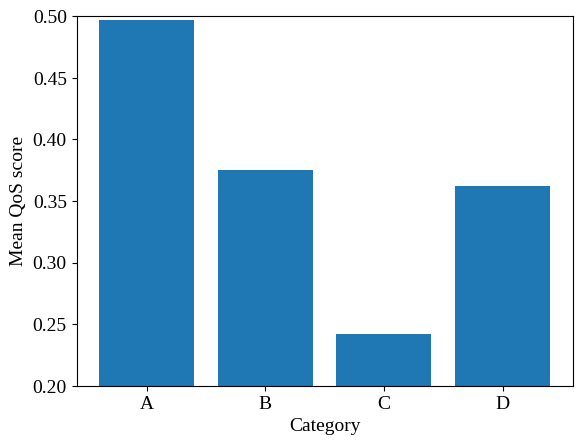

In [ ]:
noSec_means = [group_A.mean(), group_B.mean(), group_C.mean(), group_D.mean()]
noSec_labels = ['A', 'B', 'C', 'D']
# Create a bar chart
plt.bar(noSec_labels, noSec_means)

# Add title and labels to the plot

plt.xlabel('Category')
plt.ylabel('Mean QoS score')
plt.ylim(.20, .5)

# Show the plot
plt.show()

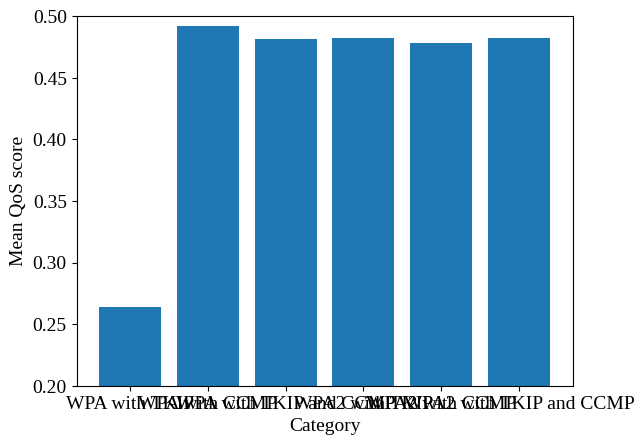

In [ ]:
group_A_means = [group_A_1.mean(), group_A_2.mean(), group_A_3.mean(), group_A_4.mean(), group_A_5.mean(), group_A_6.mean()]
group_A_labels = ['WPA with TKIP', 'WPA with CCMP', 'WPA with TKIP and CCMP', 'WPA2 with TKIP', 'WPA2 with CCMP', 'WPA2 with TKIP and CCMP']
# Create a bar chart
plt.bar(group_A_labels, group_A_means)

# Add title and labels to the plot

plt.xlabel('Category')
plt.ylabel('Mean QoS score')
plt.ylim(.20, .5)

# Show the plot
plt.show()

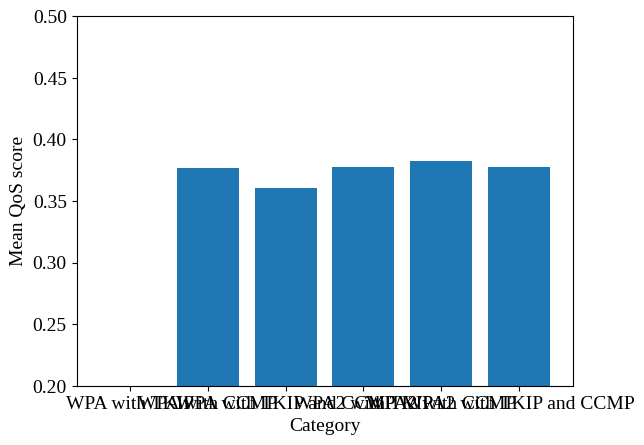

In [ ]:
group_B_means = [group_B_1.mean(), group_B_2.mean(), group_B_3.mean(), group_B_4.mean(), group_B_5.mean(), group_B_6.mean()]
group_B_labels = ['WPA with TKIP', 'WPA with CCMP', 'WPA with TKIP and CCMP', 'WPA2 with TKIP', 'WPA2 with CCMP', 'WPA2 with TKIP and CCMP']
# Create a bar chart
plt.bar(group_B_labels, group_B_means)

# Add title and labels to the plot

plt.xlabel('Category')
plt.ylabel('Mean QoS score')
plt.ylim(.2, .5)

# Show the plot
plt.show()

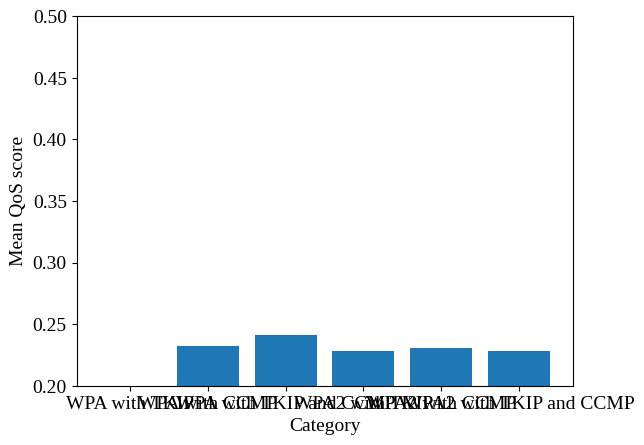

In [ ]:
group_C_means = [group_C_1.mean(), group_C_2.mean(), group_C_3.mean(), group_C_4.mean(), group_C_5.mean(), group_C_6.mean()]
group_C_labels = ['WPA with TKIP', 'WPA with CCMP', 'WPA with TKIP and CCMP', 'WPA2 with TKIP', 'WPA2 with CCMP', 'WPA2 with TKIP and CCMP']
# Create a bar chart
plt.bar(group_C_labels, group_C_means)

# Add title and labels to the plot

plt.xlabel('Category')
plt.ylabel('Mean QoS score')
plt.ylim(.2, .5)

# Show the plot
plt.show()

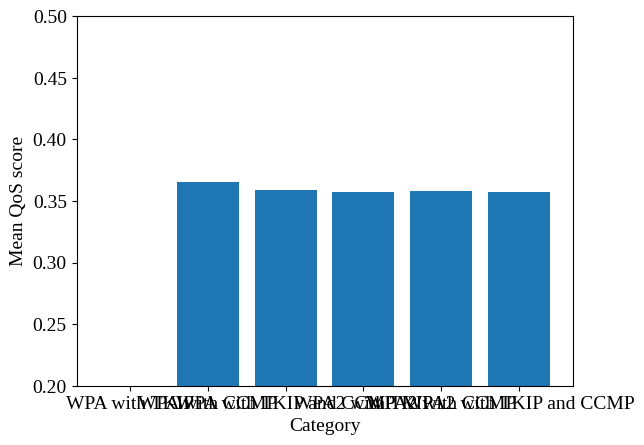

In [ ]:
group_D_means = [group_D_1.mean(), group_D_2.mean(), group_D_3.mean(), group_D_4.mean(), group_D_5.mean(), group_D_6.mean()]
group_D_labels = ['WPA with TKIP', 'WPA with CCMP', 'WPA with TKIP and CCMP', 'WPA2 with TKIP', 'WPA2 with CCMP', 'WPA2 with TKIP and CCMP']
# Create a bar chart
plt.bar(group_D_labels, group_D_means)

# Add title and labels to the plot

plt.xlabel('Category')
plt.ylabel('Mean QoS score')
plt.ylim(.2, .5)

# Show the plot
plt.show()

###Violin plots

In [ ]:
import seaborn as sns
labels = ['No security', 'WPA with TKIP', 'WPA with CCMP', 'WPA with TKIP and CCMP',
          'WPA2 with TKIP', 'WPA2 with CCMP', 'WPA2 with TKIP and CCMP']
sns.set(style="whitegrid")

<ipython-input-28-14da65790a43>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Encryption Type', y='QoS Value', data=group_a_df, palette='Set1', linewidth=2, cut=0)


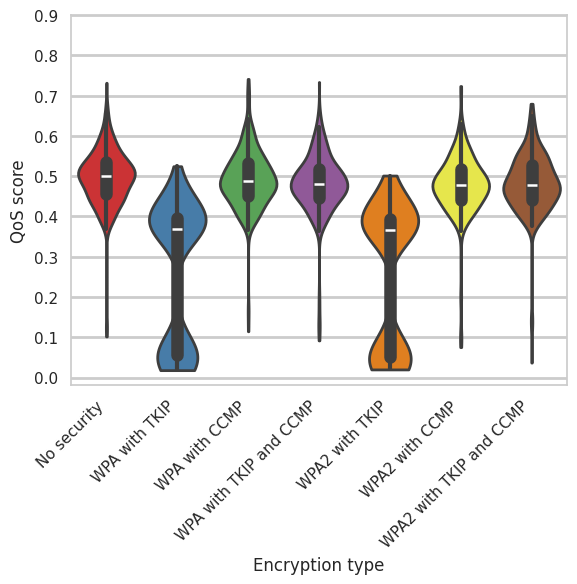

In [ ]:
import matplotlib.pyplot as plt

# Assuming group_A_1 to group_A_6 are defined and have equal lengths
groups = [group_A, group_A_1, group_A_2, group_A_3, group_A_4, group_A_5, group_A_6]

# Flatten the group data and replicate labels accordingly
QoS_values = [value for group in groups for value in group]
Encryption_types = [label for label, group in zip(labels, groups) for _ in group]

# Create DataFrame
group_a_df = pd.DataFrame({'QoS Value': QoS_values, 'Encryption Type': Encryption_types})

# Create the violin plot
sns.violinplot(x='Encryption Type', y='QoS Value', data=group_a_df, palette='Set1', linewidth=2, cut=0)
plt.xticks(rotation=45, ha="right")  # Improve label readability
plt.xlabel("Encryption type")
plt.ylabel("QoS score")
plt.yticks(np.arange(0, 1, step=0.10))
plt.savefig('group_a_violin_plot.pdf', bbox_inches='tight')
plt.show()

<ipython-input-29-de52bb5c219b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Encryption Type', y='QoS Value', data=group_b_df, palette='Set1', linewidth=2, cut=0)


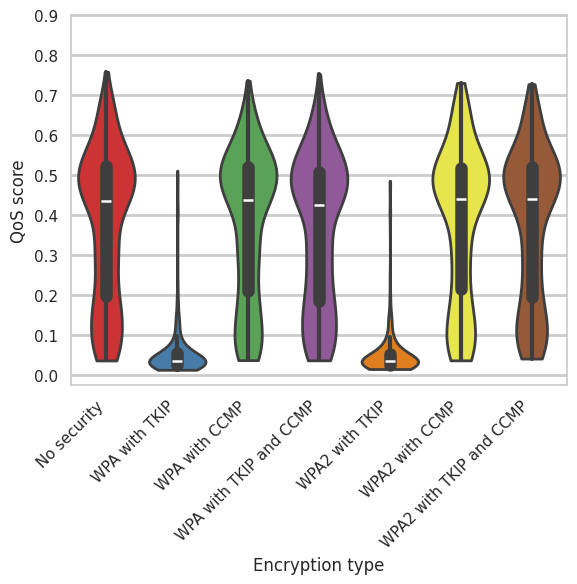

In [ ]:


# Assuming group_A_1 to group_A_6 are defined and have equal lengths
groups = [group_B, group_B_1, group_B_2, group_B_3, group_B_4, group_B_5, group_B_6]

# Flatten the group data and replicate labels accordingly
QoS_values = [value for group in groups for value in group]
Encryption_types = [label for label, group in zip(labels, groups) for _ in group]

# Create DataFrame
group_b_df = pd.DataFrame({'QoS Value': QoS_values, 'Encryption Type': Encryption_types})

# Create the violin plot
sns.violinplot(x='Encryption Type', y='QoS Value', data=group_b_df, palette='Set1', linewidth=2, cut=0)
plt.xticks(rotation=45, ha="right")  # Improve label readability
plt.xlabel("Encryption type")
plt.ylabel("QoS score")
plt.yticks(np.arange(0, 1, step=0.1))
plt.savefig('group_b_violin_plot.pdf', bbox_inches='tight')

plt.show()

<ipython-input-30-3ce24799a2d7>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Encryption Type', y='QoS Value', data=group_c_df, palette='Set1', linewidth=2,cut=0)


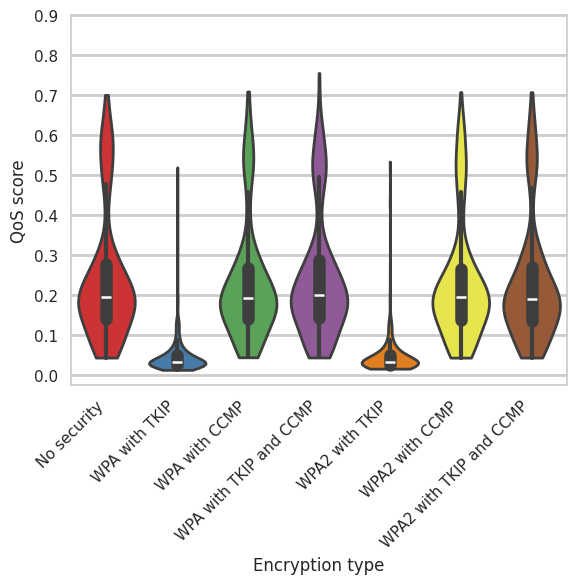

In [ ]:

# Assuming group_A_1 to group_A_6 are defined and have equal lengths
groups = [group_C, group_C_1, group_C_2, group_C_3, group_C_4, group_C_5, group_C_6]

# Flatten the group data and replicate labels accordingly
QoS_values = [value for group in groups for value in group]
Encryption_types = [label for label, group in zip(labels, groups) for _ in group]

# Create DataFrame
group_c_df = pd.DataFrame({'QoS Value': QoS_values, 'Encryption Type': Encryption_types})

# Create the violin plot
sns.violinplot(x='Encryption Type', y='QoS Value', data=group_c_df, palette='Set1', linewidth=2,cut=0)
plt.xticks(rotation=45, ha="right")  # Improve label readability
plt.xlabel("Encryption type")
plt.ylabel("QoS score")
plt.yticks(np.arange(0, 1, step=0.10))  # Adjust the step value as needed for more or fewer ticks
plt.savefig('group_c_violin_plot.pdf', bbox_inches='tight')

# Show the plot with the new y-axis ticks
plt.show()

plt.show()

<ipython-input-31-37c756a83199>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Encryption Type', y='QoS Value', data=group_d_df, palette='Set1', linewidth=2, cut=0)


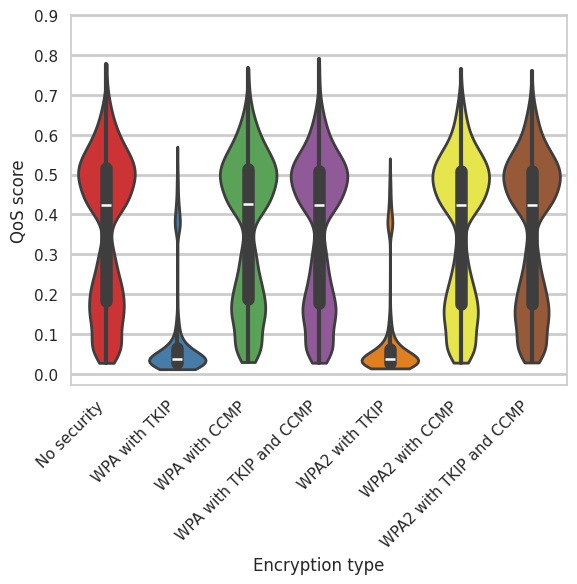

In [ ]:

# Assuming group_A_1 to group_A_6 are defined and have equal lengths
groups = [group_D, group_D_1, group_D_2, group_D_3, group_D_4, group_D_5, group_D_6]

# Flatten the group data and replicate labels accordingly
QoS_values = [value for group in groups for value in group]
Encryption_types = [label for label, group in zip(labels, groups) for _ in group]

# Create DataFrame
group_d_df = pd.DataFrame({'QoS Value': QoS_values, 'Encryption Type': Encryption_types})

# Create the violin plot
sns.violinplot(x='Encryption Type', y='QoS Value', data=group_d_df, palette='Set1', linewidth=2, cut=0)
plt.xticks(rotation=45, ha="right")  # Improve label readability
plt.xlabel("Encryption type")
plt.ylabel("QoS score")
plt.yticks(np.arange(0, 1, step=0.10))  # Adjust the step value as needed for more or fewer ticks
plt.savefig('group_d_violin_plot.pdf', bbox_inches='tight')

plt.show()

### Histograms

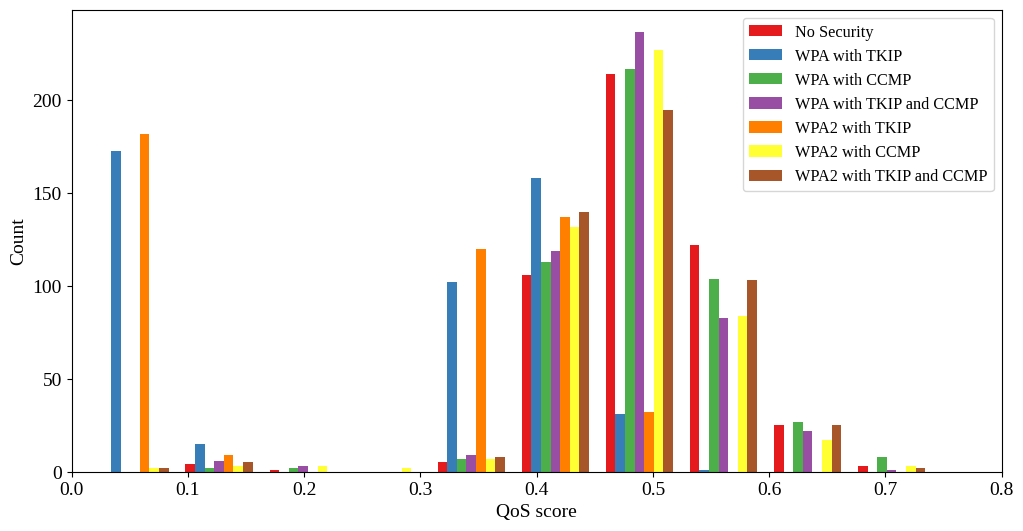

In [ ]:
plt.figure(figsize=(12, 6))
groups = [group_A, group_A_1, group_A_2, group_A_3, group_A_4, group_A_5, group_A_6]
plt.hist([group_A, group_A_1, group_A_2, group_A_3, group_A_4, group_A_5, group_A_6], label=['No Security','WPA with TKIP', 'WPA with CCMP', 'WPA with TKIP and CCMP', 'WPA2 with TKIP', 'WPA2 with CCMP', 'WPA2 with TKIP and CCMP'], color=sns.color_palette('Set1', n_colors=len(groups)))
plt.xlabel("QoS score")
plt.xlim(0, .8)
plt.ylabel("Count")
plt.legend(fontsize = 'small')
# Save the figure to a PDF file
# Show the plot
plt.show()

In [ ]:
groups = [group_A, group_A_1, group_A_2, group_A_3, group_A_4, group_A_5, group_A_6]
labels = ['No security', 'WPA with TKIP', 'WPA with CCMP', 'WPA with TKIP and CCMP',
          'WPA2 with TKIP', 'WPA2 with CCMP', 'WPA2 with TKIP and CCMP']

In [ ]:
plt.rcParams['font.size'] = 16  # You can adjust the size here


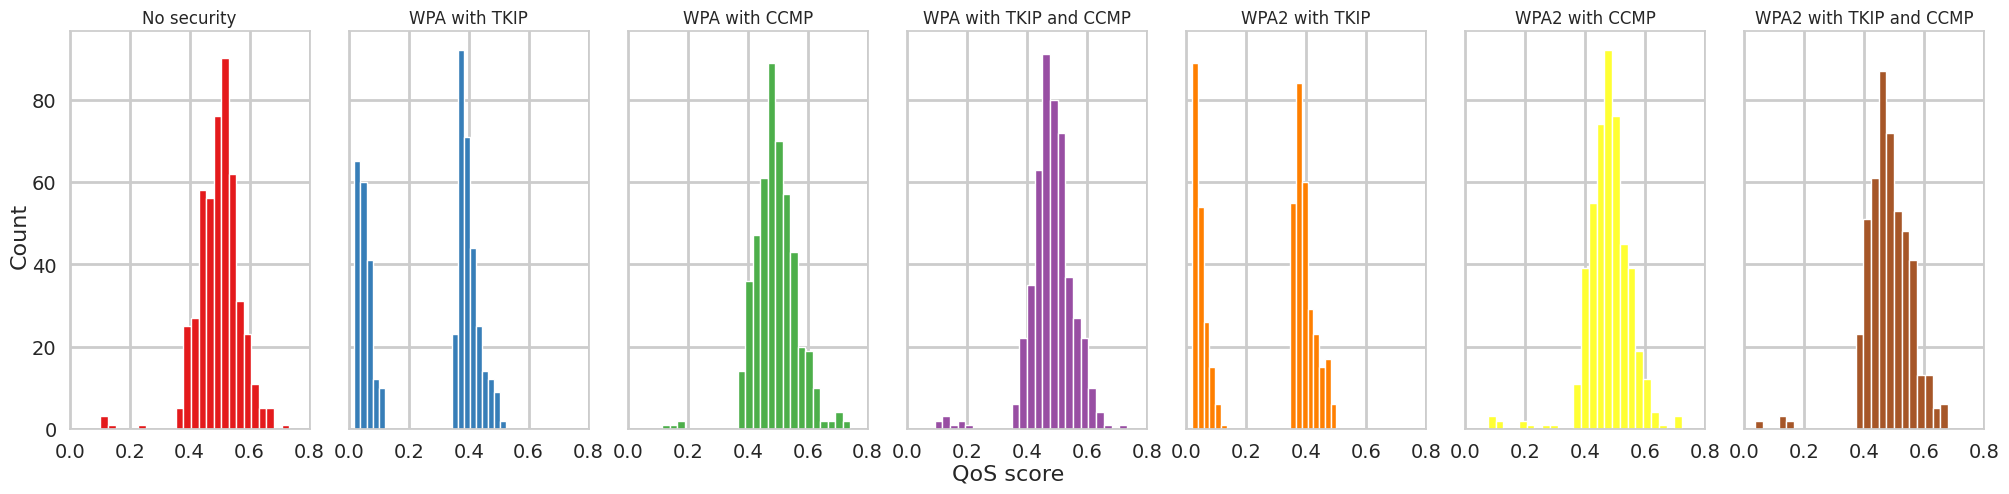

In [ ]:
# Number of rows and columns for the subplot grid
groups = [group_A, group_A_1, group_A_2, group_A_3, group_A_4, group_A_5, group_A_6]
nrows = 1  # Adjust as needed
ncols = len(groups)
# Get colors from Seaborn's 'Set1' palette
colors = sns.color_palette('Set1', n_colors=len(groups))

# Creating subplots
fig, axes = plt.subplots(1, len(groups), figsize=(20, 5), sharey=True)

for ax, group, label, color in zip(axes, groups, labels, colors):
    # Here, we use 'color' to specify the color for each histogram
    ax.hist(group, bins=25, label=label, color=color)
    ax.set_title(label)
    ax.set_xlim(0,.8)
    ax.tick_params(axis='both', which='major', labelsize=14)
fig.text(0.5, 0.01, 'QoS score', ha='center')
fig.text(0.001, 0.5, 'Count', va='center', rotation='vertical')
plt.tight_layout()
plt.savefig('group_a_histogram.pdf')
plt.show()

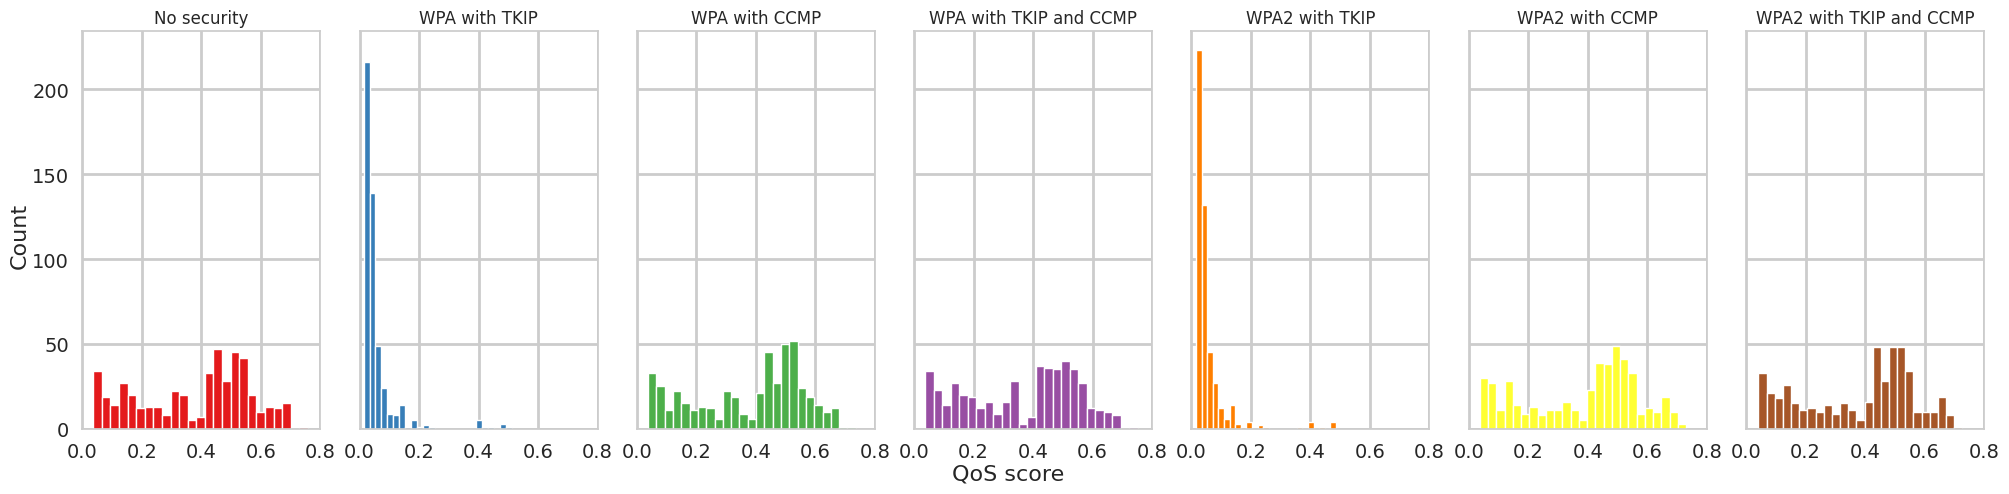

In [ ]:
# Number of rows and columns for the subplot grid
groups = [group_B, group_B_1, group_B_2, group_B_3, group_B_4, group_B_5, group_B_6]
nrows = 1  # Adjust as needed
ncols = len(groups)
# Get colors from Seaborn's 'Set1' palette
colors = sns.color_palette('Set1', n_colors=len(groups))

# Creating subplots
fig, axes = plt.subplots(1, len(groups), figsize=(20, 5), sharey=True)

for ax, group, label, color in zip(axes, groups, labels, colors):
    # Here, we use 'color' to specify the color for each histogram
    ax.hist(group, bins=25, label=label, color=color)
    ax.set_title(label)
    ax.set_xlim(0,.8)
    ax.tick_params(axis='both', which='major', labelsize=14)

fig.text(0.5, 0.01, 'QoS score', ha='center')
fig.text(0.001, 0.5, 'Count', va='center', rotation='vertical')
plt.tight_layout()
plt.savefig('group_b_histogram.pdf')
plt.show()

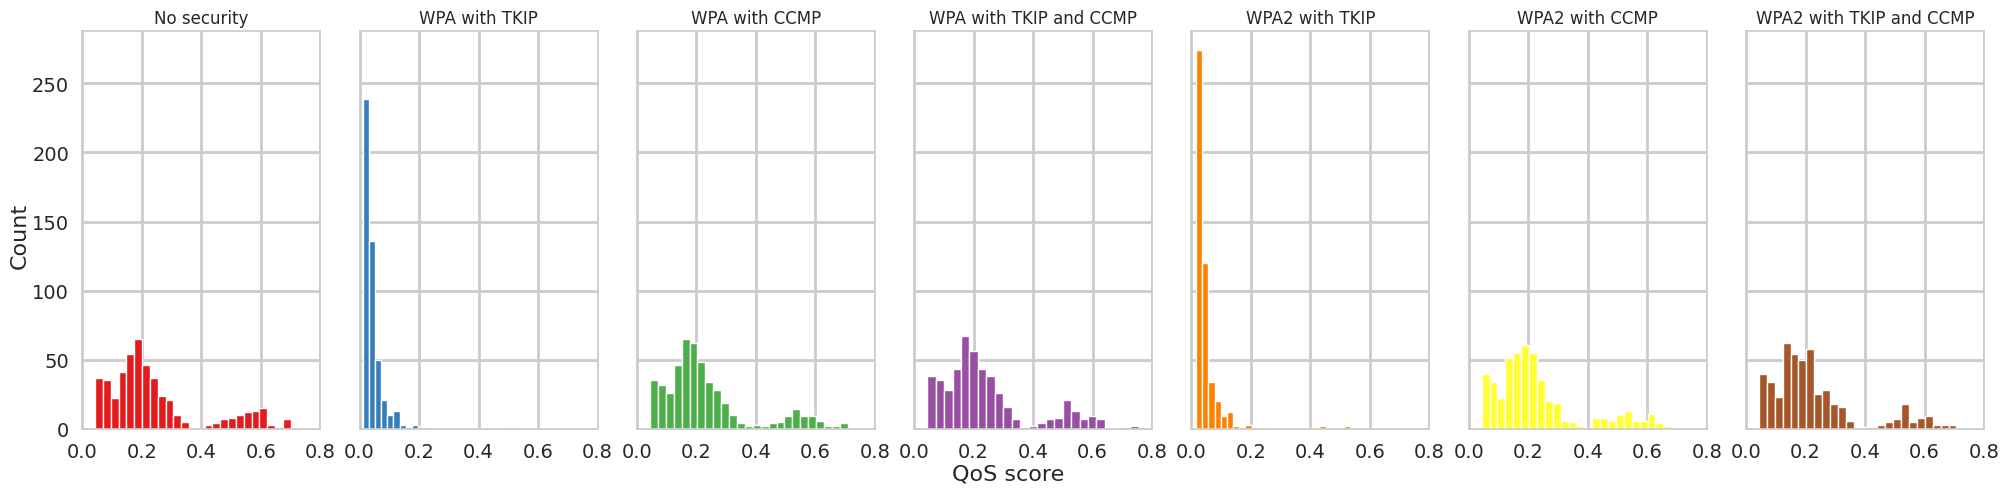

In [ ]:
# Number of rows and columns for the subplot grid
groups = [group_C, group_C_1, group_C_2, group_C_3, group_C_4, group_C_5, group_C_6]
nrows = 1  # Adjust as needed
ncols = len(groups)
# Get colors from Seaborn's 'Set1' palette
colors = sns.color_palette('Set1', n_colors=len(groups))

# Creating subplots
fig, axes = plt.subplots(1, len(groups), figsize=(20, 5), sharey=True)

for ax, group, label, color in zip(axes, groups, labels, colors):
    # Here, we use 'color' to specify the color for each histogram
    ax.hist(group, bins=25, label=label, color=color)
    ax.set_title(label)
    ax.set_xlim(0,.8)
    ax.tick_params(axis='both', which='major', labelsize=14)
fig.text(0.5, 0.01, 'QoS score', ha='center')
fig.text(0.001, 0.5, 'Count', va='center', rotation='vertical')
plt.tight_layout()
plt.savefig('group_c_histogram.pdf')
plt.show()

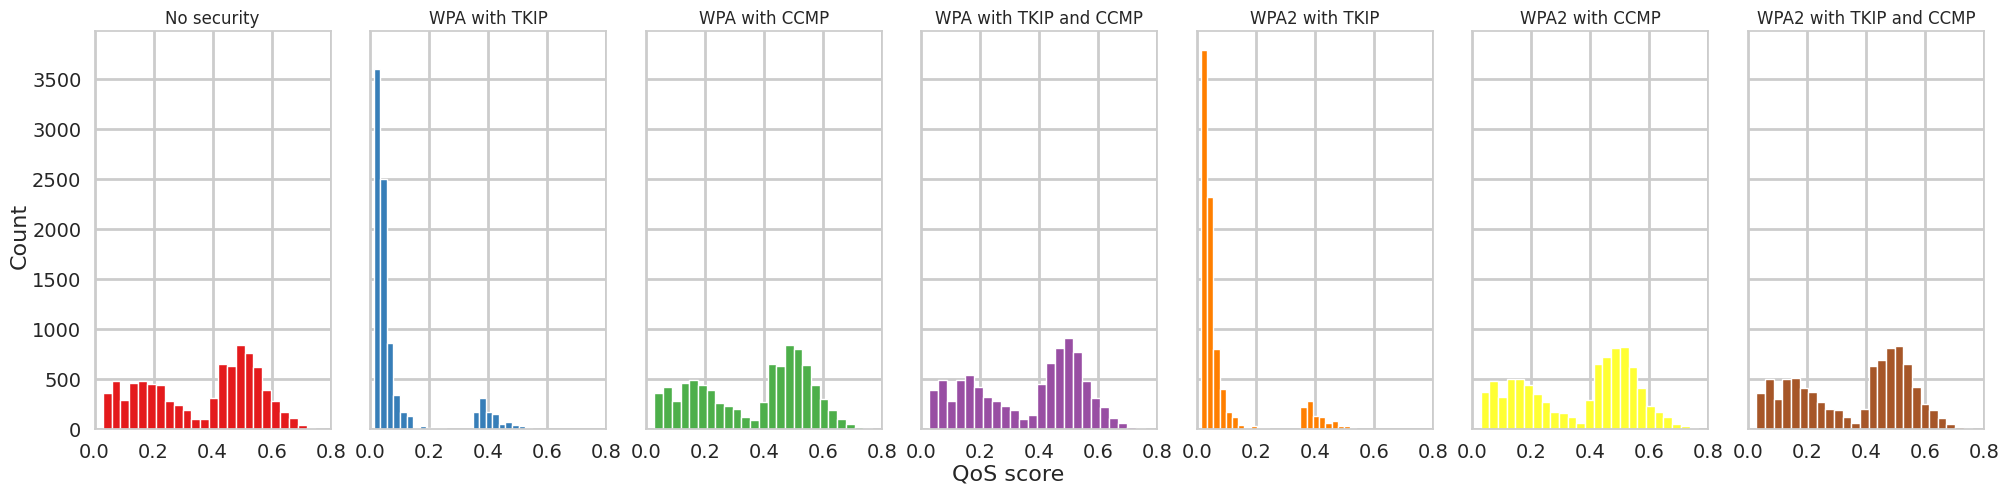

In [ ]:
# Number of rows and columns for the subplot grid
groups = [group_D, group_D_1, group_D_2, group_D_3, group_D_4, group_D_5, group_D_6]
nrows = 1  # Adjust as needed
ncols = len(groups)
# Get colors from Seaborn's 'Set1' palette
colors = sns.color_palette('Set1', n_colors=len(groups))

# Creating subplots
fig, axes = plt.subplots(1, len(groups), figsize=(20, 5), sharey=True)

for ax, group, label, color in zip(axes, groups, labels, colors):
    # Here, we use 'color' to specify the color for each histogram
    ax.hist(group, bins=25, label=label, color=color)
    ax.set_title(label)
    ax.set_xlim(0,.8)
    ax.tick_params(axis='both', which='major', labelsize=14)
# Add a single, centered x-axis label
fig.text(0.5, 0.01, 'QoS score', ha='center')
fig.text(0.001, 0.5, 'Count', va='center', rotation='vertical')
plt.tight_layout()
plt.savefig('group_d_histogram.pdf')
plt.show()

# 5G Dataset

In [ ]:
paths5G = glob.glob('/content/drive/MyDrive/INL 5G Dataset/run*/configuration_*')
dfs = []
for path in paths5G:
    dfs.append(pd.read_csv(path))
data5G = pd.concat(dfs, ignore_index=True)
display(data5G)

,configuration_id,integrity_algorithm,encryption_algorithm,test_id,file_size_bytes,file_type,file_direction,device_id,num_concurrent,start_time,end_time,total_size_bytes,packets_received,unique_packets,mean_latency,std_latency,min_latency,max_latency,median_latency
0,15,IA2,EA1,14,3000006,txt,down,pi4.5g,7,1.699989e+09,1.699989e+09,22285958,23536,23185,0.000086,0.000127,0.000000,0.004005,0.000008
1,15,IA2,EA1,14,3000006,txt,down,pi1.5g,7,1.699989e+09,1.699989e+09,22160700,23422,23071,0.000085,0.000122,0.000000,0.002827,0.000008
2,15,IA2,EA1,14,3000006,txt,down,pi6.5g,7,1.699989e+09,1.699989e+09,22285958,23536,23185,0.000086,0.000127,0.000000,0.004005,0.000008
3,15,IA2,EA1,14,3000006,txt,down,pi2.5g,7,1.699989e+09,1.699989e+09,22285958,23536,23185,0.000086,0.000127,0.000000,0.004005,0.000008
4,15,IA2,EA1,14,3000006,txt,down,pi0.5g,7,1.699989e+09,1.699989e+09,22163552,23425,23074,0.000085,0.000122,0.000000,0.002827,0.000008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120925,9,IA3,EA3,30,443926,mp3,up,pi0,4,1.693706e+09,1.693706e+09,467474,535,535,0.000192,0.000676,0.000002,0.007712,0.000033
120926,9,IA3,EA3,30,443926,mp3,up,pi3,4,1.693706e+09,1.693706e+09,471025,513,513,0.000304,0.000947,0.000003,0.011149,0.000044
120927,9,IA3,EA3,30,443926,mp3,up,pi3.5g,4,1.701201e+09,1.701201e+09,1877198,2081,2081,0.000103,0.000319,0.000000,0.011295,0.000016
120928,9,IA3,EA3,30,443926,mp3,up,pi2,4,1.693706e+09,1.693706e+09,235894,255,255,0.000493,0.001368,0.000004,0.011766,0.000056


In [ ]:
data5G['packets_dropped'] = data5G['packets_received'] - data5G['unique_packets']
data5G['duration'] = data5G['end_time'] - data5G['start_time']
data5G['throughput'] = data5G['total_size_bytes'] / data5G['duration']